# One-way ANOVA

For the one-way ANOVA, you can use either the function in "scipy.stats". Alternatively, you can use the "statsmodel" tools: they provide more, and nicer formatted, information.

Author:  Thomas Haslwanter, Date:    April-2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

# The importance of the variance

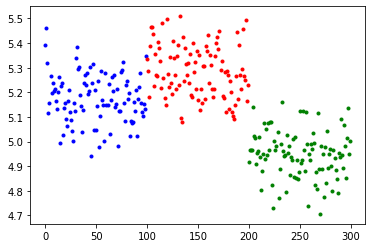

In [9]:
centers = [5.15, 5.3, 4.95]
std1 = 0.1
colors = 'brg'

data1 = []
for i in range(3):
    data1.append(stats.norm(centers[i], std1).rvs(100))
    plt.plot(np.arange(len(data1[i]))+i*len(data1[0]), data1[i], '.', color=colors[i])

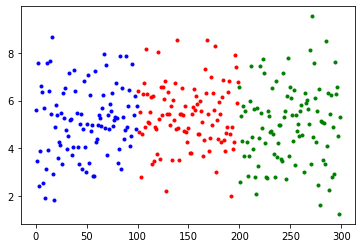

In [10]:
std2 = 1.5
data2 = []
for ii in range(3):
    data2.append(stats.norm(centers[ii], std2).rvs(100))
    plt.plot(np.arange(len(data1[ii]))+ii*len(data2[0]), data2[ii], '.', color=colors[ii])

In [14]:
data2[0]

array([5.60559088, 3.45114533, 7.56421499, 2.41138398, 3.86603527,
       6.60341667, 6.37347657, 2.54571645, 5.68775057, 1.90213572,
       3.11893749, 7.58611257, 3.90593273, 6.38075956, 7.66752903,
       5.44993036, 8.65674112, 2.90793725, 1.83031956, 4.88027063,
       5.80348257, 5.38311278, 3.58467567, 4.2429884 , 4.11913659,
       5.49563563, 3.32536367, 6.32001159, 5.28056208, 6.53883452,
       4.76071119, 3.96708769, 4.49819095, 7.13986976, 5.17416784,
       5.24110762, 3.72152153, 4.0473055 , 7.29366576, 6.40521798,
       5.48535398, 4.03155021, 3.3193545 , 4.99673588, 5.44883665,
       3.12406138, 4.81615872, 6.83978433, 4.06371957, 3.01761125,
       5.00386711, 7.05459226, 3.39019824, 6.24314802, 4.74013128,
       4.98499284, 2.82881588, 2.84985509, 7.25251582, 4.28140657,
       4.38161679, 4.98924404, 5.37505409, 5.25863328, 4.9319505 ,
       5.69851909, 6.226367  , 7.95207765, 4.84980798, 7.50635307,
       3.70309846, 5.41109201, 4.80019558, 5.85447092, 5.55436

**Note:** In both cases the means have the same difference, but the variance is much larger in data2!

## ANOVA with Sample Data

### Get and sort sample data

*Twenty-two patients undergoing cardiac bypass surgery were randomized to one of three ventilation groups:*
    
  - *Group I: Patients received 50% nitrous oxide and 50% oxygen mixture continuously for 24 h.*
  - *Group II: Patients received a 50% nitrous oxide and 50% oxygen mixture only dirng the operation.*
  - *Group III: Patients received no nitrous oxide but received 35-50% oxygen for 24 h.*
    
*The data show red cell folate levels for the three groups after 24h' ventilation.*

In [ ]:
# Get the data
inFile = 'Data//data_altman//altman_910.txt'

data = pd.read_csv(inFile, sep=",", header=None)
data



### Levene-test
A Levene-test and/or a normality test should be made before applying a oneway ANOVA.

In [65]:
# Sort them into groups, according to column 1
group1 = data[data.iloc[:,1]==1].values[:,0]
group2 = data[data.iloc[:,1]==2].values[:,0]
group3 = data[data.iloc[:,1]==3].values[:,0]

In [68]:
# check if the variances are equal with the "Levene"-test
(W,p) = stats.levene(group1, group2, group3)

if p<0.05:
    print('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p))

# estadística inferencial utilizada para evaluar la igualdad de las varianzas, si p<0.05 un grupo no es igual

### One-way ANOVA

In [67]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3)

print('The results from the one-way ANOVA, with the data from Altman 910: F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('One of the groups is significantly different.')

The results from the one-way ANOVA, with the data from Altman 910: F=3.7, p=0.04359
One of the groups is significantly different.


## Elegant alternative implementation, with pandas & statsmodels

In [97]:
# df = pd.DataFrame(data, columns=['value', 'treatment'])
df = data.rename(columns={0: 'value', 1: 'treatment'})
# the "C" indicates categorical data
model = ols('value ~ C(treatment)', df).fit()

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN
